<a href="https://colab.research.google.com/github/rodrigorenemenegazzo/Artificial-Intelligence/blob/main/TF03_CNN_Slide_69_CIFAR10_Classifica%C3%A7%C3%A3o_de_imagens.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Rodrigo Rene Menegazzo

Prática: Classificação de Imagens

CIFAR10
  * Base de imagens variadas
  *Imagens coloridas, 32 x 32
  *10 classes: airplane, automobile, bird, cat, deer, dog, frog, horse, ship, truck
  *Já está no formato correto: N x H x W x C
 

Importações

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.models import Model

Carga da base e pré-processamento

In [2]:
cifar10 = tf.keras.datasets.cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# normalizar os dados
x_train, x_test = x_train / 255.0, x_test / 255.0
y_train, y_test = y_train.flatten(), y_test.flatten()
print("x_train.shape: ", x_train.shape)
print("y_train.shape: ", y_train.shape)
print("x_test.shape: ", x_test.shape)
print("y_test.shape: ", y_test.shape)

170508288/170498071 [==============================] - 3s 0us/step
x_train.shape:  (50000, 32, 32, 3)
y_train.shape:  (50000,)
x_test.shape:  (10000, 32, 32, 3)
y_test.shape:  (10000,)


Construir o Modelo

In [3]:
# número de classes
K = len(set(y_train))

# Camadas
i = Input(shape=x_train[0].shape)
x = Conv2D(32, (3, 3), strides=2, activation="relu")(i)
x = Conv2D(64, (3, 3), strides=2, activation="relu")(x)
x = Conv2D(128, (3, 3), strides=2, activation="relu")(x)
x = Flatten()(x)
x = Dropout(0.5)(x)
x = Dense(1024, activation="relu")(x)
x = Dropout(0.2)(x)
x = Dense(K, activation="softmax")(x)

# Model ( lista entrada, lista saída)
model = Model(i, x)

Compilar e treinar o modelo

In [4]:
model.compile(optimizer="adam",
loss="sparse_categorical_crossentropy",
metrics=["accuracy"])
r = model.fit(x_train, y_train, validation_data=(x_test, y_test),
epochs=15)

Epoch 1/15
1563/1563 [==============================] - 65s 41ms/step - loss: 1.5733 - accuracy: 0.4238 - val_loss: 1.2994 - val_accuracy: 0.5358
Epoch 2/15
1563/1563 [==============================] - 56s 36ms/step - loss: 1.2797 - accuracy: 0.5376 - val_loss: 1.1688 - val_accuracy: 0.5813
Epoch 3/15
1563/1563 [==============================] - 51s 32ms/step - loss: 1.1451 - accuracy: 0.5892 - val_loss: 1.0940 - val_accuracy: 0.6101
Epoch 4/15
1563/1563 [==============================] - 51s 32ms/step - loss: 1.0620 - accuracy: 0.6196 - val_loss: 1.0198 - val_accuracy: 0.6408
Epoch 5/15
1563/1563 [==============================] - 50s 32ms/step - loss: 0.9850 - accuracy: 0.6465 - val_loss: 0.9442 - val_accuracy: 0.6678
Epoch 6/15
1563/1563 [==============================] - 51s 33ms/step - loss: 0.9241 - accuracy: 0.6690 - val_loss: 0.9325 - val_accuracy: 0.6779
Epoch 7/15
1563/1563 [==============================] - 50s 32ms/step - loss: 0.8799 - accuracy: 0.6867 - val_loss: 0.8941 -

Avaliar o modelo

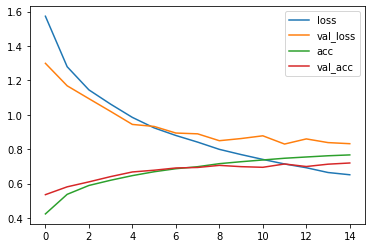

In [5]:
# Plotar a função de perda
plt.plot(r.history["loss"], label="loss")
plt.plot(r.history["val_loss"], label="val_loss")
plt.legend()

# Plotar acurácia
plt.plot(r.history["accuracy"], label="acc")
plt.plot(r.history["val_accuracy"], label="val_acc")
plt.legend()

Efetuar predições e matriz de confusão

(<Figure size 504x504 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f67b87908d0>)

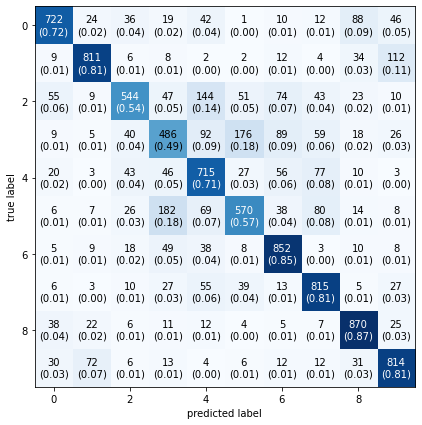

In [6]:
# Efetuar predições
y_pred = model.predict(x_test).argmax(axis=1)

# Mostrar a matriz de confusão
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(conf_mat=cm, figsize=(7, 7), show_normed=True)

Analisar algumas predições incorretas

Text(0.5, 1.0, 'True label: dog Predicted: cat')

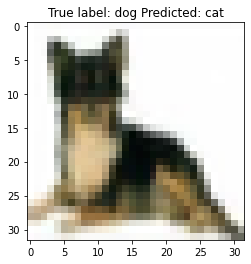

In [8]:
# Mostrar algumas classificaç!oes erradas
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
misclassified = np.where(y_pred != y_test)[0]
i = np.random.choice(misclassified)
plt.imshow(x_test[i], cmap="gray")
plt.title("True label: %s Predicted: %s" % (labels[y_test[i]], labels[y_pred[i]]))